In [14]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
Categories=['cats','dogs']
flat_data_arr=[] 
target_arr=[] 
datadir=r"C:\Users\user\Downloads\DS (1)\DS"
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
flat_data.shape

loading... category : cats
C:\Users\user\Downloads\DS (1)\DS\cats
loaded category:cats successfully
loading... category : dogs
C:\Users\user\Downloads\DS (1)\DS\dogs
loaded category:dogs successfully


(160, 67500)

In [3]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(160, 67501)

In [4]:
df


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.154919,0.174317,0.159262,0.158661,0.174557,0.174348,0.160470,0.174195,0.189462,0.162110,...,0.197318,0.138913,0.111461,0.190055,0.138656,0.107701,0.180396,0.134622,0.101754,0
1,0.112229,0.128222,0.163382,0.068747,0.084740,0.125080,0.088116,0.103733,0.150911,0.149698,...,0.756716,0.752803,0.014710,0.728919,0.718809,0.021388,0.675097,0.656312,0.013387,0
2,0.890555,0.917245,0.909245,0.909860,0.948941,0.944676,0.925683,0.980147,0.980362,0.749868,...,0.774726,0.836644,0.941021,0.761761,0.824506,0.923488,0.784133,0.846879,0.942937,0
3,0.338733,0.300445,0.227726,0.306124,0.275488,0.210677,0.249540,0.238019,0.183549,0.201959,...,0.719723,0.731329,0.704089,0.711842,0.723606,0.691368,0.715901,0.727665,0.691507,0
4,0.364724,0.310068,0.119902,0.385498,0.332242,0.135228,0.405248,0.354222,0.147759,0.422624,...,0.400584,0.412349,0.337839,0.390017,0.401991,0.326229,0.378412,0.393584,0.298625,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.346152,0.346152,0.353995,0.329006,0.329006,0.336849,0.365274,0.365274,0.373117,0.369262,...,0.571294,0.555606,0.512468,0.541951,0.524613,0.480650,0.544435,0.521115,0.474160,1
156,0.112623,0.104780,0.116544,0.114003,0.106160,0.117924,0.142725,0.134882,0.146647,0.169222,...,0.828158,0.783934,0.841594,0.872119,0.822640,0.862026,0.870598,0.828640,0.862745,1
157,0.342016,0.439906,0.278306,0.274120,0.388734,0.243767,0.284665,0.419308,0.200734,0.280575,...,0.987634,0.964745,0.972176,0.987996,0.964395,0.967420,0.984592,0.961270,0.961172,1
158,0.169945,0.154726,0.144652,0.178765,0.163114,0.158764,0.227005,0.210713,0.215206,0.255978,...,0.672700,0.667209,0.264269,0.897179,0.914992,0.311070,0.905768,0.928008,0.244797,1


In [5]:

x=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [6]:
# تقسيم الداتا للتدريب والاختبار
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=77)

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [8]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The model is {accuracy*100}% accurate")


The model is 56.25% accurate


In [9]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [10]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


              precision    recall  f1-score   support

         cat       0.52      0.73      0.61        15
         dog       0.64      0.41      0.50        17

    accuracy                           0.56        32
   macro avg       0.58      0.57      0.56        32
weighted avg       0.58      0.56      0.55        32



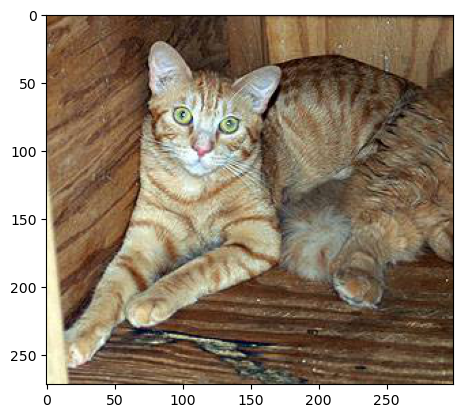

Class: Dog


array([0])

In [11]:
path=r"C:\Users\user\Downloads\DS (1)\DS\cat.4822.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
Predicted_value=clf.predict(l)
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
Predicted_value

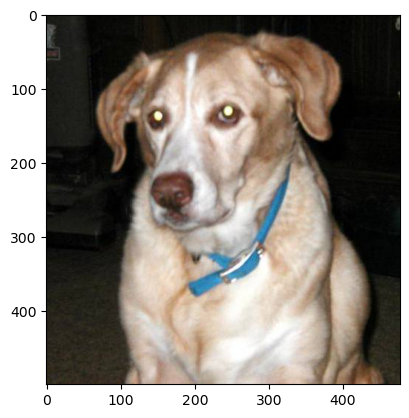

Class: Dog


array([0])

In [12]:
path=r"C:\Users\user\Downloads\DS (1)\DS\dog.364.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
Predicted_value=clf.predict(l)
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
Predicted_value

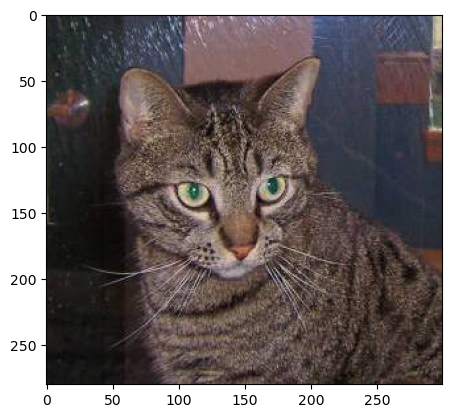

Class: Dog


array([0])

In [13]:
path=r"C:\Users\user\Downloads\DS (1)\DS\cat.1.jpg"
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
Predicted_value=clf.predict(l)
if Predicted_value >= 0.5:
    print("Class: Cat")
else:
    print("Class: Dog")
Predicted_value